In [1]:
from waymo_open_dataset import v2
import matplotlib.pyplot as plt

2023-03-24 18:49:42.630447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 18:49:42.671589: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
#@title Initial setup
from typing import Optional
import warnings
# Disable annoying warnings from PyArrow using under the hood.
warnings.simplefilter(action='ignore', category=FutureWarning)


import tensorflow as tf
import dask.dataframe as dd


# Path to the directory with all components
dataset_dir = '/home/myron/data/Waymo/data'

lidar_df = dd.read_parquet(f'{dataset_dir}/lidar/testing_lidar_10504764403039842352_460_000_480_000.parquet')
lidar_calib_df = dd.read_parquet(f'{dataset_dir}/lidar_calibration/testing_lidar_calibration_10504764403039842352_460_000_480_000.parquet')
# lidar_pose_df = dd.read_parquet(f'{dataset_dir}/lidar_pose/testing_lidar_pose_10504764403039842352_460_000_480_000.parquet')
# vehicle_pose_df = dd.read_parquet(f'{dataset_dir}/vehicle_pose/testing_vehicle_pose_10504764403039842352_460_000_480_000.parquet')

In [3]:
# lidar_lpose_df = v2.merge(lidar_df, lidar_pose_df, right_group=True)
# lidar_lpose_lcalib_df = v2.merge(lidar_lpose_df, lidar_calib_df, right_group=True)
# lidar_lpose_lcalib_vpose_df = v2.merge(lidar_lpose_lcalib_df, vehicle_pose_df, right_group=True)

lidar_lcalib_df = v2.merge(lidar_df, lidar_calib_df, right_group=True)

# Show raw data
# lidar_and_pose_df.head()
# lidar_lpose_lcalib_vpose_df.head()

lidar_lcalib_df.head()

,key.segment_context_name,key.frame_timestamp_micros,key.laser_name,[LiDARComponent].range_image_return1.values,[LiDARComponent].range_image_return1.shape,[LiDARComponent].range_image_return2.values,[LiDARComponent].range_image_return2.shape,[LiDARCalibrationComponent].extrinsic.transform,[LiDARCalibrationComponent].beam_inclination.min,[LiDARCalibrationComponent].beam_inclination.max,[LiDARCalibrationComponent].beam_inclination.values
0,10504764403039842352_460_000_480_000,1558060923374527,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-0.8531144853352591, -0.5217225826529568, 0.0...",-0.315786,0.039599,"[-0.3105449854411111, -0.30006279157785287, -0..."
1,10504764403039842352_460_000_480_000,1558060923474551,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-0.8531144853352591, -0.5217225826529568, 0.0...",-0.315786,0.039599,"[-0.3105449854411111, -0.30006279157785287, -0..."
2,10504764403039842352_460_000_480_000,1558060923574609,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-0.8531144853352591, -0.5217225826529568, 0.0...",-0.315786,0.039599,"[-0.3105449854411111, -0.30006279157785287, -0..."
3,10504764403039842352_460_000_480_000,1558060923674630,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-0.8531144853352591, -0.5217225826529568, 0.0...",-0.315786,0.039599,"[-0.3105449854411111, -0.30006279157785287, -0..."
4,10504764403039842352_460_000_480_000,1558060923774688,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[64, 2650, 4]","[-0.8531144853352591, -0.5217225826529568, 0.0...",-0.315786,0.039599,"[-0.3105449854411111, -0.30006279157785287, -0..."


tf.Tensor(
[[ 3.8364067e+01  2.5195312e-01  5.2697893e-02 -3.6776344e+01
   3.1364791e+00  3.6805017e+00]
 [ 3.8369923e+01  3.7890625e-01  3.5131928e-02 -3.6774639e+01
   3.2275536e+00  3.6804733e+00]
 [ 3.8469463e+01  3.3203125e-01  5.2697893e-02 -3.6865982e+01
   3.3267424e+00  3.6840978e+00]
 ...
 [ 7.2196112e+00  2.1484375e-02  8.1974499e-02 -4.8601069e+00
  -2.7846637e+00 -7.5714588e-03]
 [ 7.2547431e+00  1.0925293e-02  1.2881707e-01 -4.8973188e+00
  -2.7832241e+00 -1.8269777e-02]
 [ 7.1317816e+00  4.3945312e-03  2.1664689e-01 -4.7965317e+00
  -2.7213018e+00  1.9023418e-02]], shape=(152999, 6), dtype=float32)
(152999, 6)
tf.Tensor(
[[ 3.9377037e+01  2.5634766e-02  5.8553214e-03 -3.7792660e+01
   3.1263082e+00  3.7202787e+00]
 [ 3.9330193e+01  3.8867188e-01  1.7565964e-02 -3.7738495e+01
   3.2154655e+00  3.7181883e+00]
 [ 3.9388748e+01  4.1210938e-01  3.5131928e-02 -3.7789078e+01
   3.3132536e+00  3.7202086e+00]
 ...
 [ 7.1961899e+00  1.9409180e-02  9.9540465e-02 -4.8331161e+00
  -

/home/myron/.miniconda3/envs/data/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


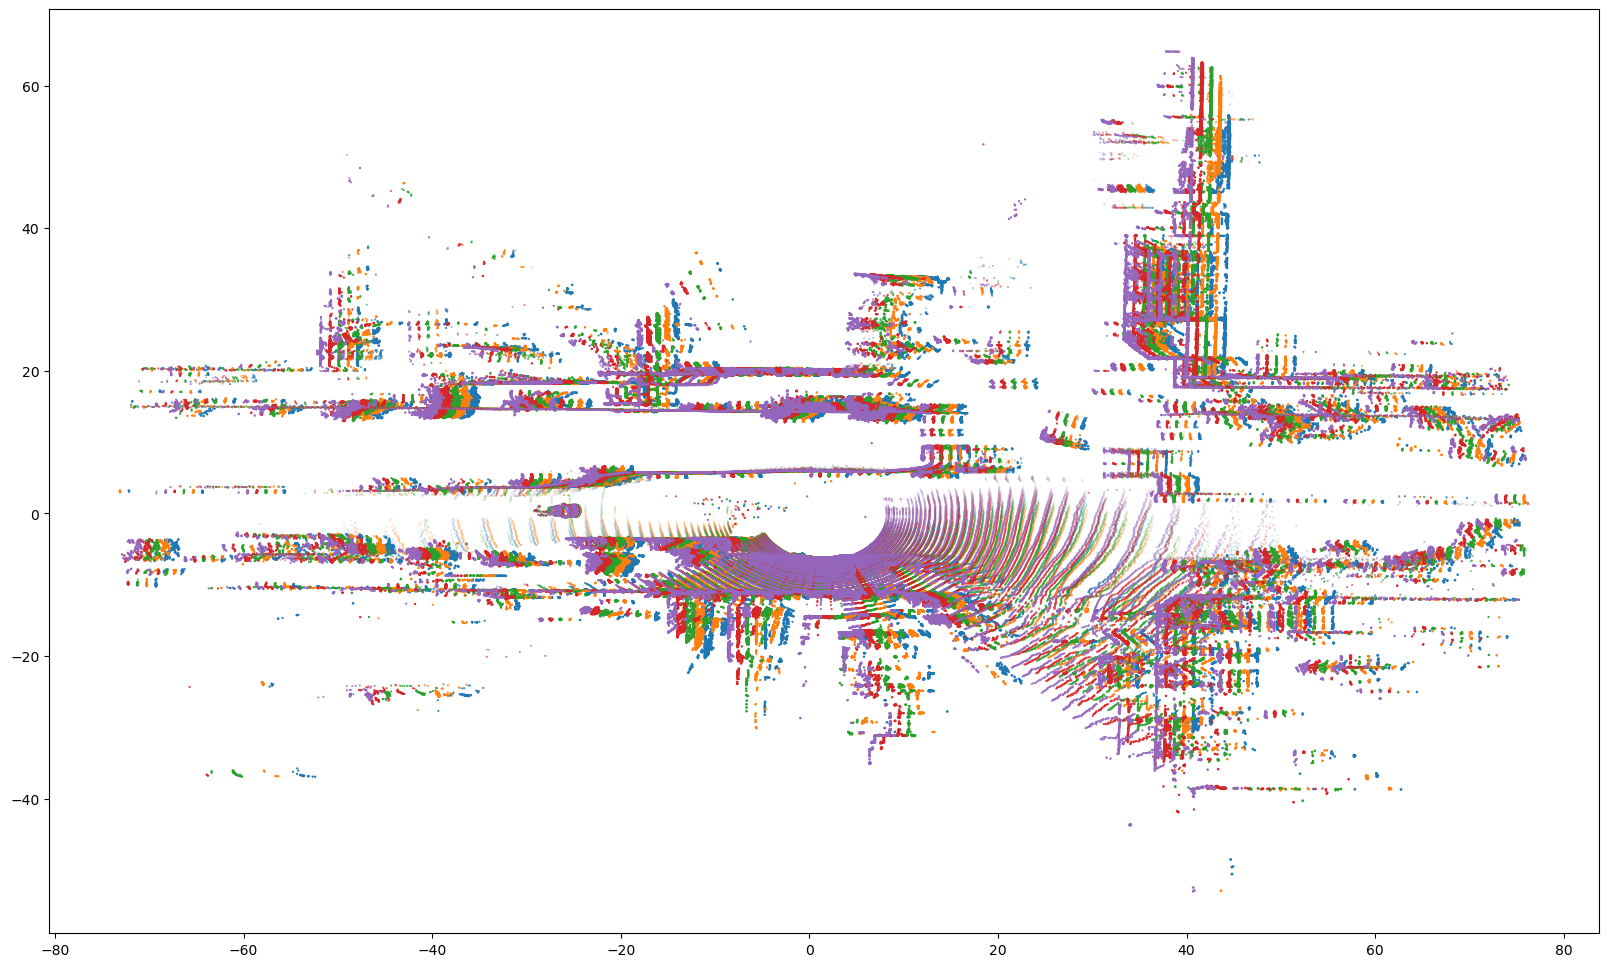

In [5]:
plt.figure(figsize=(20,12))
for i, (_, r) in enumerate(lidar_lcalib_df.iterrows()):
  # Create component dataclasses for the raw data
  lidar = v2.LiDARComponent.from_dict(r)
  # lidar_pose = v2.LiDARPoseComponent.from_dict(r)
  lidar_calib = v2.LiDARCalibrationComponent.from_dict(r)
  # vehicle_pose = v2.VehiclePoseComponent.from_dict(r)

  pc = v2.convert_range_image_to_point_cloud(lidar.range_image_return1, lidar_calib, keep_polar_features=True)
  print(pc)
  print(pc.get_shape())
  plt.scatter(pc[:, -3], pc[:, -2], marker='.')
  if(i > 3):
    break